## Libraries

In [56]:
library(ggplot2) # ggplot2 패키지 로딩
library(tseries)

## Data 

In [57]:
GCI<-read.csv("GCI.csv", head=T) # 데이터 불러오기; 경로를 입력해 주세요!!
date<-as.character(GCI$Date) # plot에 사용하기 위한 날짜 정보 추출

Warning message in box(width = 3):
“"width" is not a graphical parameter”

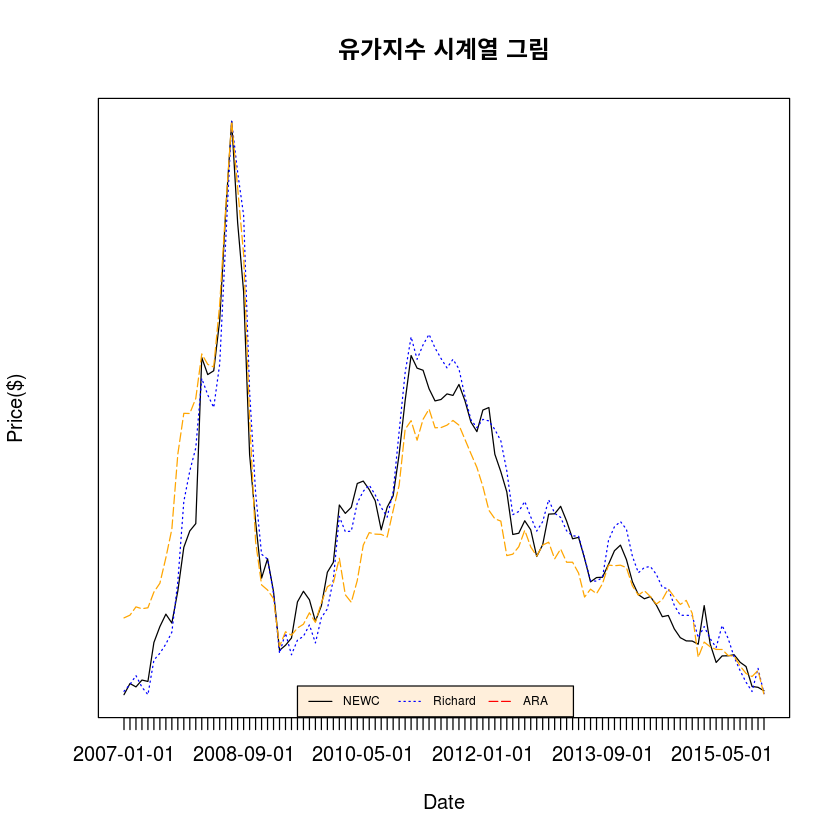

In [58]:
par(mfrow=c(1,1))
plot.ts(GCI$NEWC, axes=F, ylab="Price($)", xlab="Date",main="유가지수 시계열 그림")
box(width=3)
axis(1, 1:length(date), date)
par(new=T)
plot.ts(GCI$richard, axes=F,col="blue", lty=3, ylab="", xlab="")
par(new=T)
plot.ts(GCI$ARA, axes=F,col="orange", lty=5, ylab="", xlab="")
expre<-expression("NEWC","Richard","ARA")
legend(30, 50, expre, ncol = 3, cex = 0.6,lty=c(1,3,5),
col=c("black","blue","red"),adj=c(0,0.4),bg="antiquewhite1")

## Dickey Fuller Test


	Augmented Dickey-Fuller Test

data:  GCI[, 2]
Dickey-Fuller = -3.3871, Lag order = 4, p-value = 0.06033
alternative hypothesis: stationary


Warning message in adf.test(a):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  a
Dickey-Fuller = -4.6263, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


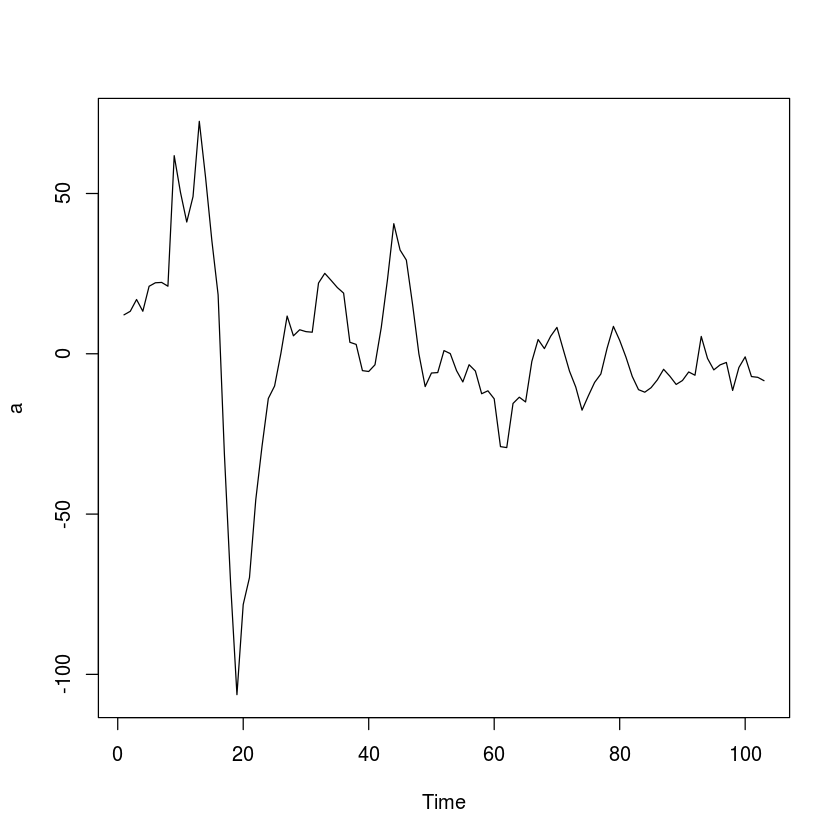

In [54]:
adf.test(GCI[,2])
a<-diff(GCI[,2],5)
adf.test(a)
plot.ts(a)

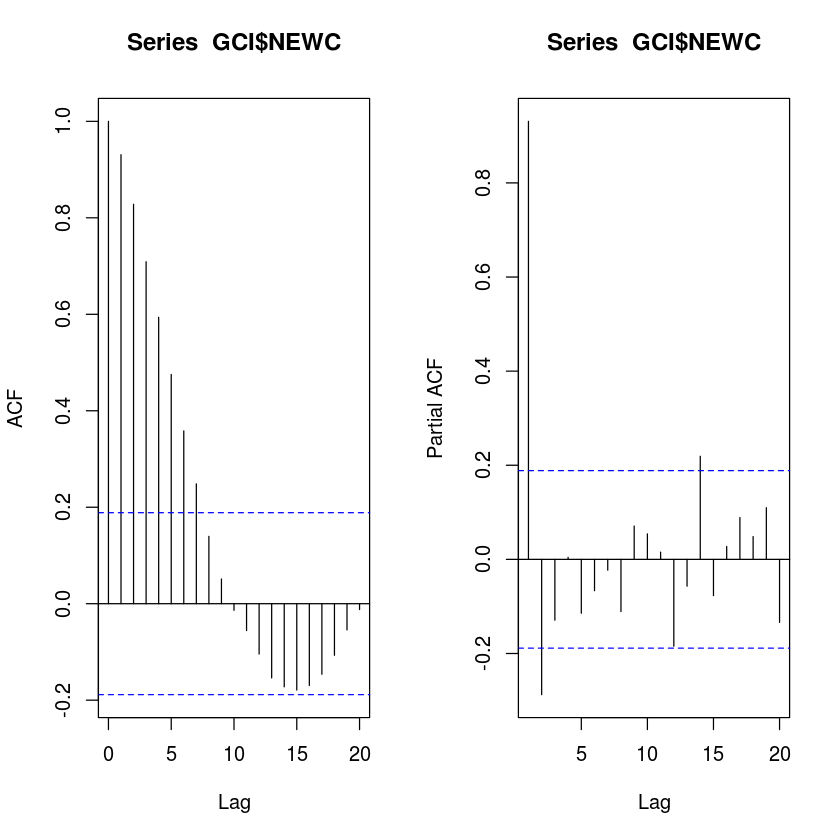

In [13]:
par(mfrow=c(1,2))
acf(GCI$NEWC); pacf(GCI$NEWC)

In [59]:
Akaike

[1] 762.0866

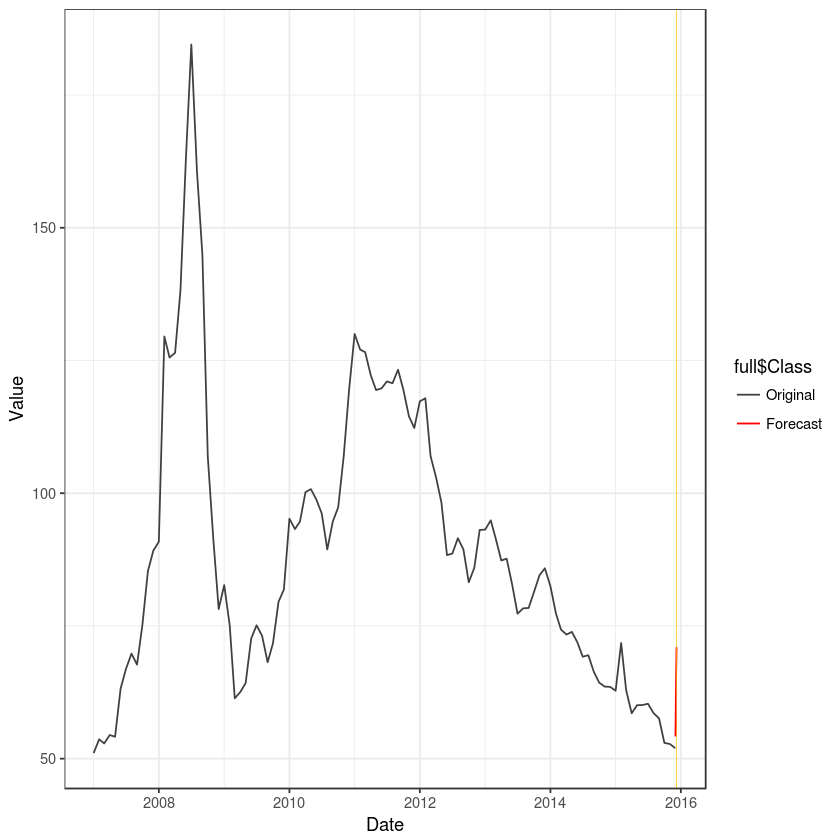

In [61]:
### 시계열 분석 ###
fit<-arima(GCI$NEWC,c(3,0,1))   # ARIMA 모델 적용
Akaike<-fit$aic                 # Akaike Information Criterion statistics
fore.n<-7                       # 예측 일수 지정 (7일 예측)
forecast<-predict(fit, fore.n)  # 7일 예측값 출력
fore.date<-as.Date(date)[length(date)]+c(1:7) # 예측된 7일에 대한 날짜 생성
f1<-data.frame(Date=as.Date(date), Value=GCI$NEWC,Class="Original") # 원자료 데이터 프레임 생성
f2<-data.frame(Date=fore.date, Value=as.numeric(forecast$pred),Class="Forecast") # 7일 예측 데이터 프레임 생성
full<-rbind(f1,f2) # 원자료와 예측자료 Binding

### 예측결과 시계열 그래프 생성 (빨간줄이 예측결과)################################################################
g<-ggplot(full) + geom_line(aes(x=Date,y=Value,colour=full$Class)) + 
                        scale_color_manual(values=c("grey25","red"))
g + theme_bw() + geom_rect(aes(xmin=as.Date(f2$Date[2]),xmax=as.Date(f2$Date[7]),
                               ymin=-Inf,ymax=+Inf),alpha=0.01,fill="gold")

In [31]:
f2

Date,Value,Class
2015-12-02,54.10254,Forecast
2015-12-03,57.13063,Forecast
2015-12-04,60.52460,Forecast
2015-12-05,63.94960,Forecast
2015-12-06,67.20134,Forecast
2015-12-07,70.16598,Forecast
2015-12-08,72.79077,Forecast


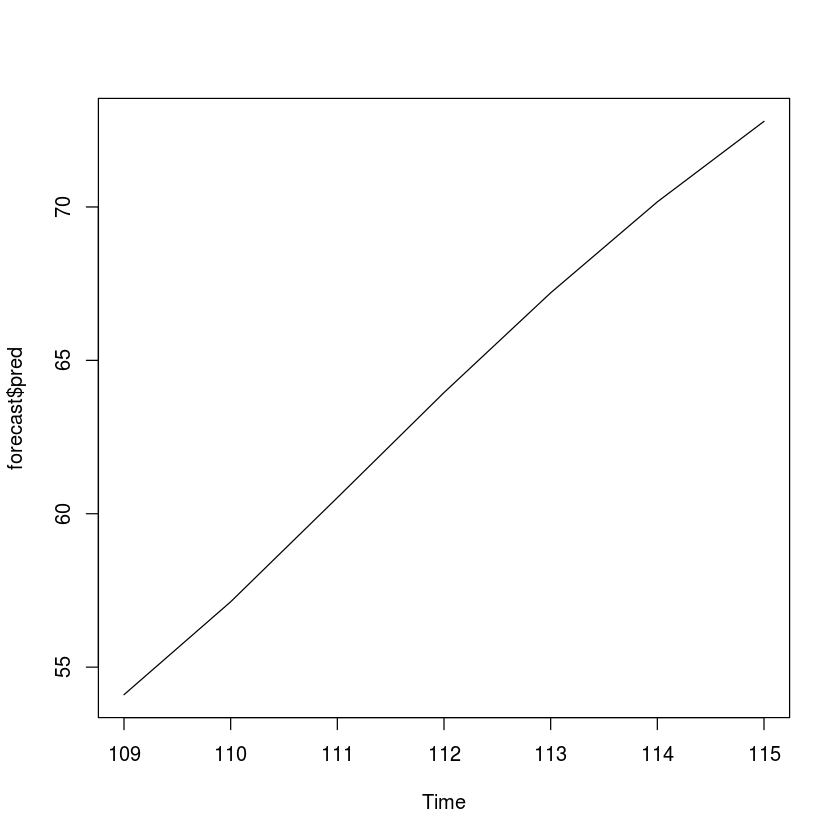

In [27]:
plot(forecast$pred)